In [0]:
import numpy as np

In [0]:
XS = np.array([0.038, 0.194, 0.425, 0.626, 1.253, 2.500, 3.740])
YS = np.array([0.050, 0.127, 0.094, 0.2122, 0.2729, 0.2665, 0.3317])
BS = np.array([0.8, 0.4], dtype=np.float)

In [0]:
def y_expected(bs, xs, ys):
    return xs * bs[0] / (xs + bs[1])


def r(bs, xs, ys):
    return ys - y_expected(bs, xs, ys)


def dr_b1(bs, xs):
    return -xs / (bs[1] + xs)


def dr_b2(bs, xs):
    return (bs[0] * xs) / ((bs[1] + xs) ** 2)

In [0]:
bss = np.array(BS)
jr = np.zeros((len(XS), 2))

mses = []

In [0]:
for i in range(6):
    print()

    jr[:, 0] = dr_b1(bss, XS)
    jr[:, 1] = dr_b2(bss, XS)

    jj = (np.dot(np.dot(np.linalg.inv(np.dot(jr.T, jr)), jr.T), r(bss, XS, YS)))

    bss -= jj

    print(bss)

    mses.append(np.sqrt(np.sum(r(bss, XS, YS) ** 2) / len(XS)))


[0.34712768 0.95146721]

[0.35042376 0.35523741]

[0.35309438 0.49101871]

[0.36043924 0.54723913]

[0.36171242 0.55554035]

[0.36182764 0.55621372]


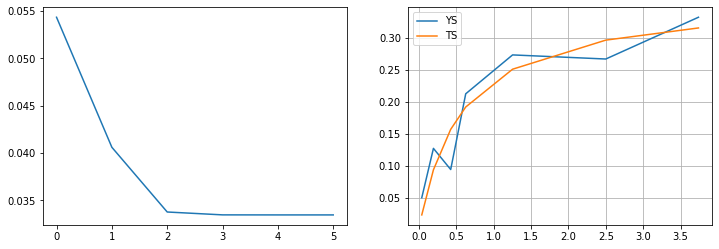

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=[12, 4])

plt.subplot(1, 2, 1)
plt.plot(mses, label='MSE')

plt.subplot(1, 2, 2)
plt.plot(XS, YS, label='YS')
plt.plot(XS, y_expected(bss, XS, YS), label='TS')

plt.legend()
plt.grid()
    
plt.show()

In [0]:
np.round(mses, 6)

array([0.054349, 0.040616, 0.033783, 0.03348 , 0.033475, 0.033475])